In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df=df.drop(columns='Cabin',axis=1)

In [7]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,Q
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,S


In [8]:
df1=df.copy()

In [9]:
df1.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,C
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,Q
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,S


In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [13]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

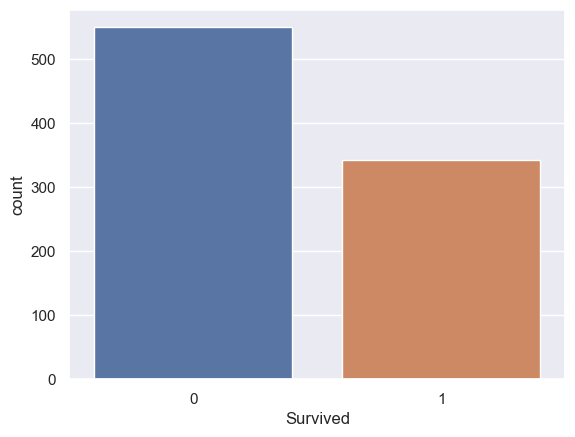

In [15]:
sns.countplot(data=df,x='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

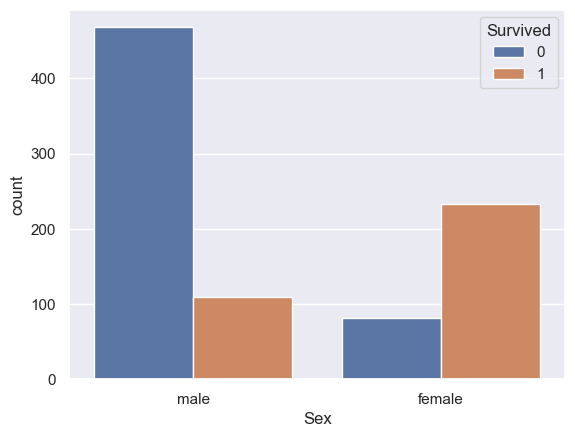

In [16]:
sns.countplot(data=df,x='Sex',hue='Survived')

In [17]:
titanic_data=df.copy()

In [19]:
titanic_data_test=pd.read_csv("titanic_test.csv")

In [21]:
# Removing colmuns not using in model
titanic_data = titanic_data.drop (['PassengerId'], axis = 1)
titanic_data = titanic_data.drop(['Ticket'], axis=1)
titanic_data_test = titanic_data_test.drop(['Ticket'], axis=1)
titanic_data = titanic_data.drop(['Name'], axis=1)
titanic_data_test = titanic_data_test.drop(['Name'], axis=1) 
titanic_data = titanic_data.drop(['Age'], axis=1)
titanic_data_test = titanic_data_test.drop(['Age'], axis=1)
titanic_data = titanic_data.drop(['Fare'], axis=1)
titanic_data_test = titanic_data_test.drop(['Fare'], axis=1)  

data = [titanic_data, titanic_data_test]

common_value = 'S'

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

KeyError: "['PassengerId'] not found in axis"

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
